In [3]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import os

pd.options.display.max_colwidth = 200

# get current directory
path = os.getcwd()
parent = os.path.dirname(path)

DIR_DATA = parent+ '/data/'

### EDA 

In [4]:
df_loans = pd.read_csv(DIR_DATA+'infringment_processed.csv')
df_columns = pd.read_csv(DIR_DATA+'columns_description.csv')

<AxesSubplot: xlabel='gender', ylabel='count'>

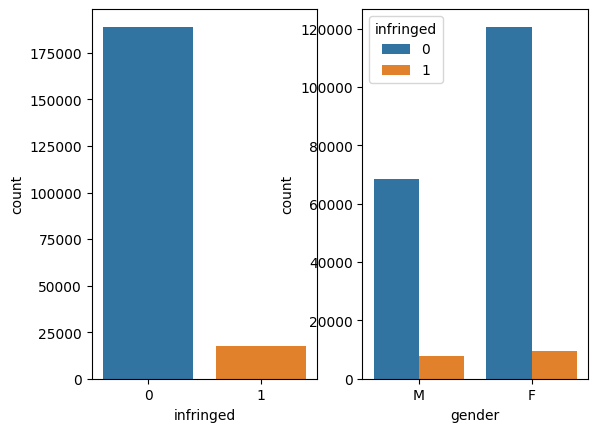

In [5]:
fig, axes = plt.subplots(1, 2)

sb.countplot(data=df_loans, x="infringed", ax= axes[0])
sb.countplot(x ='gender', hue = "infringed", data = df_loans, ax= axes[1])

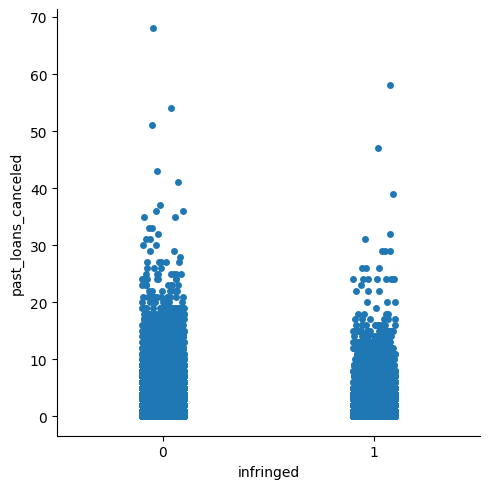

In [6]:
sb.catplot(data=df_loans, x="infringed", y="past_loans_canceled")

In [7]:
cond = df_loans['infringed'] == 1
df_infriged = df_loans[cond]
df_infriged.head()

,Unnamed: 0,loan_id,infringed,contract_type,gender,has_own_car,has_own_realty,num_children,annual_income,credit_amount,...,num_req_bureau_year,avg_days_decision,past_avg_amount_annuity,past_avg_amt_application,past_avg_amt_credit,past_loans_approved,past_loans_refused,past_loans_canceled,past_loans_unused,past_loans_total
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,1,606.0,9251.7750,179055.000,179055.00,1,0,0,0,1
28,40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,...,4,1432.0,16749.9150,242617.500,338818.50,4,0,2,0,6
30,42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,...,2,1066.6,5747.8590,35602.200,55715.40,5,0,0,0,5
64,94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,...,2,883.5,12261.8025,79239.375,115589.25,4,0,0,0,4
75,110,100130,1,Cash loans,F,N,Y,1,157500.0,723996.0,...,0,262.0,11883.3300,104991.750,114842.25,2,0,0,0,2
